In [1]:
import re
import random
import torch.nn as nn
import torch.optim as optim
import pickle as p
from model import CharRnn
from tools import *
import string

In [2]:
def get_names(filename,reverse=0):
    names=open(filename, encoding='utf-8').read().strip()
    if reverse:
        return names[::-1].split('\n')
    else:
        return names.split('\n')
names=get_names('../data/male.txt',reverse=0)
names

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim',
 'Abdullah',
 'Abe',
 'Abel',
 'Abelard',
 'Abner',
 'Abraham',
 'Abram',
 'Ace',
 'Adair',
 'Adam',
 'Adams',
 'Addie',
 'Adger',
 'Aditya',
 'Adlai',
 'Adnan',
 'Adolf',
 'Adolfo',
 'Adolph',
 'Adolphe',
 'Adolpho',
 'Adolphus',
 'Adrian',
 'Adrick',
 'Adrien',
 'Agamemnon',
 'Aguinaldo',
 'Aguste',
 'Agustin',
 'Aharon',
 'Ahmad',
 'Ahmed',
 'Ahmet',
 'Ajai',
 'Ajay',
 'Al',
 'Alaa',
 'Alain',
 'Alan',
 'Alasdair',
 'Alastair',
 'Albatros',
 'Albert',
 'Alberto',
 'Albrecht',
 'Alden',
 'Aldis',
 'Aldo',
 'Aldric',
 'Aldrich',
 'Aldus',
 'Aldwin',
 'Alec',
 'Aleck',
 'Alejandro',
 'Aleks',
 'Aleksandrs',
 'Alessandro',
 'Alex',
 'Alexander',
 'Alexei',
 'Alexis',
 'Alf',
 'Alfie',
 'Alfonse',
 'Alfonso',
 'Alfonzo',
 'Alford',
 'Alfred',
 'Alfredo',
 'Algernon',
 'Ali',
 'Alic',
 'Alister',
 'Alix',
 'Allah',
 'Allan',
 'Allen',
 'Alley',
 'Allie',
 'Allin',
 'Allyn',
 'Alonso',


In [3]:
index = {}
for ch in string.ascii_letters+'-':
    index[ch]=len(index)
index['\n'] = len(index)
index['#'] = len(index)

n_letters = len(index)
index

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 'A': 26,
 'B': 27,
 'C': 28,
 'D': 29,
 'E': 30,
 'F': 31,
 'G': 32,
 'H': 33,
 'I': 34,
 'J': 35,
 'K': 36,
 'L': 37,
 'M': 38,
 'N': 39,
 'O': 40,
 'P': 41,
 'Q': 42,
 'R': 43,
 'S': 44,
 'T': 45,
 'U': 46,
 'V': 47,
 'W': 48,
 'X': 49,
 'Y': 50,
 'Z': 51,
 '-': 52,
 '\n': 53,
 '#': 54}

In [4]:
data = names.copy()
for i in range(len(names)):
    data[i] = ['#']+list(names[i]) + ['\n']
for line in data:
    print(line)

['#', 'A', 'a', 'm', 'i', 'r', '\n']
['#', 'A', 'a', 'r', 'o', 'n', '\n']
['#', 'A', 'b', 'b', 'e', 'y', '\n']
['#', 'A', 'b', 'b', 'i', 'e', '\n']
['#', 'A', 'b', 'b', 'o', 't', '\n']
['#', 'A', 'b', 'b', 'o', 't', 't', '\n']
['#', 'A', 'b', 'b', 'y', '\n']
['#', 'A', 'b', 'd', 'e', 'l', '\n']
['#', 'A', 'b', 'd', 'u', 'l', '\n']
['#', 'A', 'b', 'd', 'u', 'l', 'k', 'a', 'r', 'i', 'm', '\n']
['#', 'A', 'b', 'd', 'u', 'l', 'l', 'a', 'h', '\n']
['#', 'A', 'b', 'e', '\n']
['#', 'A', 'b', 'e', 'l', '\n']
['#', 'A', 'b', 'e', 'l', 'a', 'r', 'd', '\n']
['#', 'A', 'b', 'n', 'e', 'r', '\n']
['#', 'A', 'b', 'r', 'a', 'h', 'a', 'm', '\n']
['#', 'A', 'b', 'r', 'a', 'm', '\n']
['#', 'A', 'c', 'e', '\n']
['#', 'A', 'd', 'a', 'i', 'r', '\n']
['#', 'A', 'd', 'a', 'm', '\n']
['#', 'A', 'd', 'a', 'm', 's', '\n']
['#', 'A', 'd', 'd', 'i', 'e', '\n']
['#', 'A', 'd', 'g', 'e', 'r', '\n']
['#', 'A', 'd', 'i', 't', 'y', 'a', '\n']
['#', 'A', 'd', 'l', 'a', 'i', '\n']
['#', 'A', 'd', 'n', 'a', 'n', '\n']
['#

['#', 'A', 'u', 'g', 'u', 's', 't', 'u', 's', '\n']
['#', 'A', 'u', 's', 't', 'e', 'n', '\n']
['#', 'A', 'u', 's', 't', 'i', 'n', '\n']
['#', 'A', 'v', 'e', '\n']
['#', 'A', 'v', 'e', 'r', 'e', 'l', 'l', '\n']
['#', 'A', 'v', 'e', 'r', 'i', 'l', '\n']
['#', 'A', 'v', 'e', 'r', 'i', 'l', 'l', '\n']
['#', 'A', 'v', 'e', 'r', 'y', '\n']
['#', 'A', 'v', 'i', '\n']
['#', 'A', 'v', 'r', 'a', 'h', 'a', 'm', '\n']
['#', 'A', 'v', 'r', 'a', 'm', '\n']
['#', 'A', 'v', 'r', 'o', 'm', '\n']
['#', 'A', 'x', 'e', 'l', '\n']
['#', 'A', 'y', 'l', 'm', 'e', 'r', '\n']
['#', 'A', 'z', 'i', 'z', '\n']
['#', 'B', 'a', 'i', 'l', 'e', 'y', '\n']
['#', 'B', 'a', 'i', 'l', 'i', 'e', '\n']
['#', 'B', 'a', 'i', 'l', 'l', 'i', 'e', '\n']
['#', 'B', 'a', 'i', 'l', 'y', '\n']
['#', 'B', 'a', 'i', 'r', 'd', '\n']
['#', 'B', 'a', 'l', 'd', 'w', 'i', 'n', '\n']
['#', 'B', 'a', 'n', 'c', 'r', 'o', 'f', 't', '\n']
['#', 'B', 'a', 'r', 'b', 'a', 'b', 'a', 's', '\n']
['#', 'B', 'a', 'r', 'c', 'l', 'a', 'y', '\n']
['#', '

['#', 'C', 'a', 'm', 'e', 'r', 'o', 'n', '\n']
['#', 'C', 'a', 'm', 'm', 'y', '\n']
['#', 'C', 'a', 'r', 'e', 'y', '\n']
['#', 'C', 'a', 'r', 'l', '\n']
['#', 'C', 'a', 'r', 'l', 'e', 'i', 'g', 'h', '\n']
['#', 'C', 'a', 'r', 'l', 'i', 'e', '\n']
['#', 'C', 'a', 'r', 'l', 'i', 'n', '\n']
['#', 'C', 'a', 'r', 'l', 'o', '\n']
['#', 'C', 'a', 'r', 'l', 'o', 's', '\n']
['#', 'C', 'a', 'r', 'l', 't', 'o', 'n', '\n']
['#', 'C', 'a', 'r', 'l', 'y', 'l', 'e', '\n']
['#', 'C', 'a', 'r', 'm', 'i', 'n', 'e', '\n']
['#', 'C', 'a', 'r', 'r', 'o', 'l', 'l', '\n']
['#', 'C', 'a', 'r', 's', 'o', 'n', '\n']
['#', 'C', 'a', 'r', 's', 't', 'e', 'n', '\n']
['#', 'C', 'a', 'r', 't', 'e', 'r', '\n']
['#', 'C', 'a', 'r', 'y', '\n']
['#', 'C', 'a', 'r', 'y', 'l', '\n']
['#', 'C', 'a', 's', 'e', '\n']
['#', 'C', 'a', 's', 'e', 'y', '\n']
['#', 'C', 'a', 's', 'p', 'a', 'r', '\n']
['#', 'C', 'a', 's', 'p', 'e', 'r', '\n']
['#', 'C', 'a', 's', 's', '\n']
['#', 'C', 'a', 't', '\n']
['#', 'C', 'e', 'c', 'i', 'l', '

['#', 'D', 'a', 'r', 't', 'h', '\n']
['#', 'D', 'a', 'r', 'w', 'i', 'n', '\n']
['#', 'D', 'a', 'r', 'y', 'l', '\n']
['#', 'D', 'a', 'r', 'y', 'l', 'e', '\n']
['#', 'D', 'a', 'v', 'e', '\n']
['#', 'D', 'a', 'v', 'e', 'y', '\n']
['#', 'D', 'a', 'v', 'i', 'd', '\n']
['#', 'D', 'a', 'v', 'i', 'd', 'd', 'e', '\n']
['#', 'D', 'a', 'v', 'i', 'd', 'e', '\n']
['#', 'D', 'a', 'v', 'i', 'd', 's', 'o', 'n', '\n']
['#', 'D', 'a', 'v', 'i', 'e', '\n']
['#', 'D', 'a', 'v', 'i', 'n', '\n']
['#', 'D', 'a', 'v', 'i', 's', '\n']
['#', 'D', 'a', 'v', 'o', 'n', '\n']
['#', 'D', 'a', 'v', 'o', 'u', 'd', '\n']
['#', 'D', 'a', 'v', 'y', '\n']
['#', 'D', 'a', 'w', 's', 'o', 'n', '\n']
['#', 'D', 'e', 'a', 'n', '\n']
['#', 'D', 'e', 'a', 'n', 'e', '\n']
['#', 'D', 'e', 'l', '\n']
['#', 'D', 'e', 'l', 'b', 'e', 'r', 't', '\n']
['#', 'D', 'e', 'l', 'l', '\n']
['#', 'D', 'e', 'l', 'm', 'a', 'r', '\n']
['#', 'D', 'e', 'm', 'e', 't', 'r', 'e', '\n']
['#', 'D', 'e', 'm', 'e', 't', 'r', 'i', '\n']
['#', 'D', 'e', 'm',

['#', 'E', 'r', 'i', 'k', '\n']
['#', 'E', 'r', 'i', 'n', '\n']
['#', 'E', 'r', 'l', '\n']
['#', 'E', 'r', 'n', 'e', 's', 't', '\n']
['#', 'E', 'r', 'n', 'e', 's', 't', 'o', '\n']
['#', 'E', 'r', 'n', 'i', 'e', '\n']
['#', 'E', 'r', 'n', 's', 't', '\n']
['#', 'E', 'r', 'n', 'y', '\n']
['#', 'E', 'r', 'r', 'o', 'l', '\n']
['#', 'E', 'r', 'v', 'i', 'n', '\n']
['#', 'E', 'r', 'w', 'i', 'n', '\n']
['#', 'E', 's', 'a', 'u', '\n']
['#', 'E', 's', 'm', 'e', '\n']
['#', 'E', 's', 't', 'e', 'b', 'a', 'n', '\n']
['#', 'E', 't', 'h', 'a', 'n', '\n']
['#', 'E', 't', 'h', 'e', 'l', 'b', 'e', 'r', 't', '\n']
['#', 'E', 't', 'h', 'e', 'l', 'r', 'e', 'd', '\n']
['#', 'E', 't', 'i', 'e', 'n', 'n', 'e', '\n']
['#', 'E', 'u', 'c', 'l', 'i', 'd', '\n']
['#', 'E', 'u', 'g', 'e', 'n', '\n']
['#', 'E', 'u', 'g', 'e', 'n', 'e', '\n']
['#', 'E', 'u', 's', 't', 'a', 'c', 'e', '\n']
['#', 'E', 'v', '\n']
['#', 'E', 'v', 'a', 'n', '\n']
['#', 'E', 'v', 'e', 'l', 'y', 'n', '\n']
['#', 'E', 'v', 'e', 'r', 'a', 'r',

['#', 'G', 'i', 'a', 'n', '\n']
['#', 'G', 'i', 'a', 'n', 'c', 'a', 'r', 'l', 'o', '\n']
['#', 'G', 'i', 'a', 'v', 'a', 'n', 'i', '\n']
['#', 'G', 'i', 'b', 'b', '\n']
['#', 'G', 'i', 'd', 'e', 'o', 'n', '\n']
['#', 'G', 'i', 'f', 'f', '\n']
['#', 'G', 'i', 'f', 'f', 'a', 'r', 'd', '\n']
['#', 'G', 'i', 'f', 'f', 'e', 'r', '\n']
['#', 'G', 'i', 'f', 'f', 'i', 'e', '\n']
['#', 'G', 'i', 'f', 'f', 'o', 'r', 'd', '\n']
['#', 'G', 'i', 'f', 'f', 'y', '\n']
['#', 'G', 'i', 'l', '\n']
['#', 'G', 'i', 'l', 'b', 'e', 'r', 't', '\n']
['#', 'G', 'i', 'l', 'b', 'e', 'r', 't', 'o', '\n']
['#', 'G', 'i', 'l', 'b', 'u', 'r', 't', '\n']
['#', 'G', 'i', 'l', 'e', 's', '\n']
['#', 'G', 'i', 'l', 'l', '\n']
['#', 'G', 'i', 'l', 'l', 'e', 's', '\n']
['#', 'G', 'i', 'n', 'g', 'e', 'r', '\n']
['#', 'G', 'i', 'n', 'o', '\n']
['#', 'G', 'i', 'o', 'r', 'd', 'a', 'n', 'o', '\n']
['#', 'G', 'i', 'o', 'r', 'g', 'i', '\n']
['#', 'G', 'i', 'o', 'r', 'g', 'i', 'o', '\n']
['#', 'G', 'i', 'o', 'v', 'a', 'n', 'n', 'e'

['#', 'H', 'e', 'w', '\n']
['#', 'H', 'e', 'w', 'e', '\n']
['#', 'H', 'e', 'w', 'e', 't', '\n']
['#', 'H', 'e', 'w', 'e', 't', 't', '\n']
['#', 'H', 'e', 'w', 'i', 'e', '\n']
['#', 'H', 'e', 'w', 'i', 't', 't', '\n']
['#', 'H', 'e', 'y', 'w', 'o', 'o', 'd', '\n']
['#', 'H', 'e', 'z', 'e', 'k', 'i', 'a', 'h', '\n']
['#', 'H', 'i', 'g', 'g', 'i', 'n', 's', '\n']
['#', 'H', 'i', 'l', 'a', 'r', 'y', '\n']
['#', 'H', 'i', 'l', 'b', 'e', 'r', 't', '\n']
['#', 'H', 'i', 'l', 'l', '\n']
['#', 'H', 'i', 'l', 'l', 'a', 'r', 'd', '\n']
['#', 'H', 'i', 'l', 'l', 'a', 'r', 'y', '\n']
['#', 'H', 'i', 'l', 'l', 'e', 'l', '\n']
['#', 'H', 'i', 'l', 'l', 'e', 'r', 'y', '\n']
['#', 'H', 'i', 'l', 'l', 'i', 'a', 'r', 'd', '\n']
['#', 'H', 'i', 'l', 't', 'o', 'n', '\n']
['#', 'H', 'i', 'r', 'a', 'l', 'a', 'l', '\n']
['#', 'H', 'i', 'r', 'a', 'm', '\n']
['#', 'H', 'i', 'r', 'o', '\n']
['#', 'H', 'i', 'r', 's', 'c', 'h', '\n']
['#', 'H', 'o', 'b', 'a', 'r', 't', '\n']
['#', 'H', 'o', 'd', 'g', 'e', '\n']
['

['#', 'J', 'o', 'h', 'n', '-', 'P', 'a', 't', 'r', 'i', 'c', 'k', '\n']
['#', 'J', 'o', 'h', 'n', 'a', 't', 'h', 'a', 'n', '\n']
['#', 'J', 'o', 'h', 'n', 'a', 't', 'h', 'o', 'n', '\n']
['#', 'J', 'o', 'h', 'n', 'n', 'i', 'e', '\n']
['#', 'J', 'o', 'h', 'n', 'n', 'y', '\n']
['#', 'J', 'o', 'h', 'n', 'y', '\n']
['#', 'J', 'o', 'n', '\n']
['#', 'J', 'o', 'n', 'a', 'h', '\n']
['#', 'J', 'o', 'n', 'a', 's', '\n']
['#', 'J', 'o', 'n', 'a', 't', 'h', 'a', 'n', '\n']
['#', 'J', 'o', 'n', 'a', 't', 'h', 'o', 'n', '\n']
['#', 'J', 'o', 'n', 'n', 'y', '\n']
['#', 'J', 'o', 'r', 'd', 'a', 'n', '\n']
['#', 'J', 'o', 'r', 'd', 'o', 'n', '\n']
['#', 'J', 'o', 'r', 'd', 'y', '\n']
['#', 'J', 'o', 'r', 'g', 'e', '\n']
['#', 'J', 'o', 'r', 'y', '\n']
['#', 'J', 'o', 's', 'e', '\n']
['#', 'J', 'o', 's', 'e', 'f', '\n']
['#', 'J', 'o', 's', 'e', 'p', 'h', '\n']
['#', 'J', 'o', 's', 'e', 'p', 'h', 'u', 's', '\n']
['#', 'J', 'o', 's', 'h', '\n']
['#', 'J', 'o', 's', 'h', 'u', 'a', '\n']
['#', 'J', 'o', 's'

['#', 'L', 'o', 'u', '\n']
['#', 'L', 'o', 'u', 'i', 'e', '\n']
['#', 'L', 'o', 'u', 'i', 's', '\n']
['#', 'L', 'o', 'v', 'e', 'l', 'l', '\n']
['#', 'L', 'o', 'w', 'e', 'l', 'l', '\n']
['#', 'L', 'u', 'c', 'a', 's', '\n']
['#', 'L', 'u', 'c', 'e', '\n']
['#', 'L', 'u', 'c', 'i', 'a', 'n', '\n']
['#', 'L', 'u', 'c', 'i', 'a', 'n', 'o', '\n']
['#', 'L', 'u', 'c', 'i', 'e', 'n', '\n']
['#', 'L', 'u', 'c', 'i', 'o', '\n']
['#', 'L', 'u', 'c', 'i', 'u', 's', '\n']
['#', 'L', 'u', 'd', 'v', 'i', 'g', '\n']
['#', 'L', 'u', 'd', 'w', 'i', 'g', '\n']
['#', 'L', 'u', 'i', 'g', 'i', '\n']
['#', 'L', 'u', 'i', 's', '\n']
['#', 'L', 'u', 'k', 'a', 's', '\n']
['#', 'L', 'u', 'k', 'e', '\n']
['#', 'L', 'u', 't', 'h', 'e', 'r', '\n']
['#', 'L', 'y', 'l', 'e', '\n']
['#', 'L', 'y', 'n', '\n']
['#', 'L', 'y', 'n', 'd', 'o', 'n', '\n']
['#', 'L', 'y', 'n', 'n', '\n']
['#', 'M', 'a', 'c', '\n']
['#', 'M', 'a', 'c', 'e', '\n']
['#', 'M', 'a', 'c', 'k', '\n']
['#', 'M', 'a', 'c', 'k', 'e', 'n', 'z', 'i', 'e

['#', 'M', 'o', 'r', 'r', 'i', 'e', '\n']
['#', 'M', 'o', 'r', 'r', 'i', 's', '\n']
['#', 'M', 'o', 'r', 'r', 'y', '\n']
['#', 'M', 'o', 'r', 's', 'e', '\n']
['#', 'M', 'o', 'r', 't', '\n']
['#', 'M', 'o', 'r', 't', 'e', 'n', '\n']
['#', 'M', 'o', 'r', 't', 'i', 'e', '\n']
['#', 'M', 'o', 'r', 't', 'i', 'm', 'e', 'r', '\n']
['#', 'M', 'o', 'r', 't', 'o', 'n', '\n']
['#', 'M', 'o', 'r', 't', 'y', '\n']
['#', 'M', 'o', 's', 'e', '\n']
['#', 'M', 'o', 's', 'e', 's', '\n']
['#', 'M', 'o', 's', 'h', 'e', '\n']
['#', 'M', 'o', 's', 's', '\n']
['#', 'M', 'u', 'f', 'f', 'i', 'n', '\n']
['#', 'M', 'u', 'g', 's', 'y', '\n']
['#', 'M', 'u', 'h', 'a', 'm', 'm', 'a', 'd', '\n']
['#', 'M', 'u', 'n', 'm', 'r', 'o', '\n']
['#', 'M', 'u', 'n', 'r', 'o', 'e', '\n']
['#', 'M', 'u', 'r', 'd', 'o', 'c', 'h', '\n']
['#', 'M', 'u', 'r', 'd', 'o', 'c', 'k', '\n']
['#', 'M', 'u', 'r', 'p', 'h', 'y', '\n']
['#', 'M', 'u', 'r', 'r', 'a', 'y', '\n']
['#', 'M', 'u', 's', 't', 'a', 'f', 'a', '\n']
['#', 'M', 'y', '

['#', 'P', 'e', 'p', 'i', 'l', 'l', 'o', '\n']
['#', 'P', 'e', 'p', 'i', 't', 'o', '\n']
['#', 'P', 'e', 'r', 'c', 'e', 'v', 'a', 'l', '\n']
['#', 'P', 'e', 'r', 'c', 'i', 'v', 'a', 'l', '\n']
['#', 'P', 'e', 'r', 'c', 'y', '\n']
['#', 'P', 'e', 'r', 'r', 'y', '\n']
['#', 'P', 'e', 't', 'e', '\n']
['#', 'P', 'e', 't', 'e', 'r', '\n']
['#', 'P', 'e', 't', 'e', 'y', '\n']
['#', 'P', 'e', 't', 'r', '\n']
['#', 'P', 'e', 'y', 't', 'e', 'r', '\n']
['#', 'P', 'e', 'y', 't', 'o', 'n', '\n']
['#', 'P', 'h', 'i', 'l', '\n']
['#', 'P', 'h', 'i', 'l', 'b', 'e', 'r', 't', '\n']
['#', 'P', 'h', 'i', 'l', 'i', 'p', '\n']
['#', 'P', 'h', 'i', 'l', 'l', 'i', 'p', '\n']
['#', 'P', 'h', 'i', 'l', 'l', 'i', 'p', 'e', '\n']
['#', 'P', 'h', 'i', 'l', 'l', 'i', 'p', 'p', '\n']
['#', 'P', 'h', 'i', 'n', 'e', 'a', 's', '\n']
['#', 'P', 'h', 'i', 'p', '\n']
['#', 'P', 'i', 'e', 'r', 'c', 'e', '\n']
['#', 'P', 'i', 'e', 'r', 'r', 'e', '\n']
['#', 'P', 'i', 'e', 'r', 's', 'o', 'n', '\n']
['#', 'P', 'i', 'e', 't'

['#', 'R', 'o', 'd', 'o', 'l', 'f', 'o', '\n']
['#', 'R', 'o', 'd', 'o', 'l', 'p', 'h', '\n']
['#', 'R', 'o', 'd', 'o', 'l', 'p', 'h', 'e', '\n']
['#', 'R', 'o', 'd', 'r', 'i', 'c', 'k', '\n']
['#', 'R', 'o', 'd', 'r', 'i', 'g', 'o', '\n']
['#', 'R', 'o', 'd', 'r', 'i', 'q', 'u', 'e', '\n']
['#', 'R', 'o', 'g', '\n']
['#', 'R', 'o', 'g', 'e', 'r', '\n']
['#', 'R', 'o', 'g', 'e', 'r', 's', '\n']
['#', 'R', 'o', 'i', 'c', 'e', '\n']
['#', 'R', 'o', 'l', 'a', 'n', 'd', '\n']
['#', 'R', 'o', 'l', 'a', 'n', 'd', 'o', '\n']
['#', 'R', 'o', 'l', 'f', '\n']
['#', 'R', 'o', 'l', 'f', 'e', '\n']
['#', 'R', 'o', 'l', 'l', 'a', 'n', 'd', '\n']
['#', 'R', 'o', 'l', 'l', 'i', 'n', '\n']
['#', 'R', 'o', 'l', 'l', 'i', 'n', 's', '\n']
['#', 'R', 'o', 'l', 'l', 'o', '\n']
['#', 'R', 'o', 'l', 'p', 'h', '\n']
['#', 'R', 'o', 'm', 'a', 'i', 'n', '\n']
['#', 'R', 'o', 'm', 'a', 'n', '\n']
['#', 'R', 'o', 'm', 'e', 'o', '\n']
['#', 'R', 'o', 'n', '\n']
['#', 'R', 'o', 'n', 'a', 'l', 'd', '\n']
['#', 'R', '

['#', 'S', 'i', 'g', 'f', 'r', 'i', 'e', 'd', '\n']
['#', 'S', 'i', 'g', 'm', 'u', 'n', 'd', '\n']
['#', 'S', 'i', 'l', 'a', 's', '\n']
['#', 'S', 'i', 'l', 'v', 'a', 'i', 'n', '\n']
['#', 'S', 'i', 'l', 'v', 'a', 'n', '\n']
['#', 'S', 'i', 'l', 'v', 'a', 'n', 'o', '\n']
['#', 'S', 'i', 'l', 'v', 'a', 'n', 'u', 's', '\n']
['#', 'S', 'i', 'l', 'v', 'e', 's', 't', 'e', 'r', '\n']
['#', 'S', 'i', 'l', 'v', 'i', 'o', '\n']
['#', 'S', 'i', 'm', '\n']
['#', 'S', 'i', 'm', 'e', 'o', 'n', '\n']
['#', 'S', 'i', 'm', 'm', 'o', 'n', 'd', 's', '\n']
['#', 'S', 'i', 'm', 'o', 'n', '\n']
['#', 'S', 'i', 'm', 'o', 'n', 'e', '\n']
['#', 'S', 'i', 'n', 'c', 'l', 'a', 'i', 'r', '\n']
['#', 'S', 'i', 'n', 'c', 'l', 'a', 'r', 'e', '\n']
['#', 'S', 'i', 'v', 'e', 'r', 't', '\n']
['#', 'S', 'i', 'w', 'a', 'r', 'd', '\n']
['#', 'S', 'k', 'e', 'l', 'l', '\n']
['#', 'S', 'k', 'e', 'l', 'l', 'y', '\n']
['#', 'S', 'k', 'i', 'p', '\n']
['#', 'S', 'k', 'i', 'p', 'p', '\n']
['#', 'S', 'k', 'i', 'p', 'p', 'e', 'r', 

['#', 'T', 'h', 'i', 'b', 'a', 'u', 'd', '\n']
['#', 'T', 'h', 'i', 'b', 'a', 'u', 't', '\n']
['#', 'T', 'h', 'o', 'm', '\n']
['#', 'T', 'h', 'o', 'm', 'a', 's', '\n']
['#', 'T', 'h', 'o', 'r', '\n']
['#', 'T', 'h', 'o', 'r', 'n', '\n']
['#', 'T', 'h', 'o', 'r', 'n', 'd', 'i', 'k', 'e', '\n']
['#', 'T', 'h', 'o', 'r', 'n', 'i', 'e', '\n']
['#', 'T', 'h', 'o', 'r', 'n', 't', 'o', 'n', '\n']
['#', 'T', 'h', 'o', 'r', 'n', 'y', '\n']
['#', 'T', 'h', 'o', 'r', 'p', 'e', '\n']
['#', 'T', 'h', 'o', 'r', 's', 't', 'e', 'i', 'n', '\n']
['#', 'T', 'h', 'o', 'r', 's', 't', 'e', 'n', '\n']
['#', 'T', 'h', 'o', 'r', 'v', 'a', 'l', 'd', '\n']
['#', 'T', 'h', 'u', 'r', 's', 't', 'a', 'n', '\n']
['#', 'T', 'h', 'u', 'r', 's', 't', 'o', 'n', '\n']
['#', 'T', 'i', 'b', 'o', 'l', 'd', '\n']
['#', 'T', 'i', 'e', 'b', 'o', 'l', 'd', '\n']
['#', 'T', 'i', 'e', 'b', 'o', 'u', 't', '\n']
['#', 'T', 'i', 'l', 'e', 'r', '\n']
['#', 'T', 'i', 'm', '\n']
['#', 'T', 'i', 'm', 'm', 'i', 'e', '\n']
['#', 'T', 'i', 

['#', 'W', 'a', 'l', 't', 'e', 'r', '\n']
['#', 'W', 'a', 'l', 't', 'h', 'e', 'r', '\n']
['#', 'W', 'a', 'l', 't', 'o', 'n', '\n']
['#', 'W', 'a', 'n', 'g', '\n']
['#', 'W', 'a', 'r', 'd', '\n']
['#', 'W', 'a', 'r', 'd', 'e', '\n']
['#', 'W', 'a', 'r', 'd', 'e', 'n', '\n']
['#', 'W', 'a', 'r', 'e', '\n']
['#', 'W', 'a', 'r', 'i', 'n', 'g', '\n']
['#', 'W', 'a', 'r', 'n', 'e', 'r', '\n']
['#', 'W', 'a', 'r', 'r', 'e', 'n', '\n']
['#', 'W', 'a', 's', 'h', '\n']
['#', 'W', 'a', 's', 'h', 'i', 'n', 'g', 't', 'o', 'n', '\n']
['#', 'W', 'a', 't', '\n']
['#', 'W', 'a', 'v', 'e', 'r', 'l', 'e', 'y', '\n']
['#', 'W', 'a', 'v', 'e', 'r', 'l', 'y', '\n']
['#', 'W', 'a', 'y', '\n']
['#', 'W', 'a', 'y', 'l', 'a', 'n', '\n']
['#', 'W', 'a', 'y', 'l', 'a', 'n', 'd', '\n']
['#', 'W', 'a', 'y', 'l', 'e', 'n', '\n']
['#', 'W', 'a', 'y', 'l', 'i', 'n', '\n']
['#', 'W', 'a', 'y', 'l', 'o', 'n', '\n']
['#', 'W', 'a', 'y', 'n', 'e', '\n']
['#', 'W', 'e', 'b', '\n']
['#', 'W', 'e', 'b', 'b', '\n']
['#', 'W',

In [5]:
model = CharRnn(len(index), 128, 128)
optimizer = optim.RMSprop(model.parameters(), lr=0.01, weight_decay=0.0001)
criterion = nn.NLLLoss()

In [6]:
output_tensor = {}
for w in index:
    output_tensor.setdefault(w, get_output_tensor(w, index))
output_tensor

{'a': tensor([0]),
 'b': tensor([1]),
 'c': tensor([2]),
 'd': tensor([3]),
 'e': tensor([4]),
 'f': tensor([5]),
 'g': tensor([6]),
 'h': tensor([7]),
 'i': tensor([8]),
 'j': tensor([9]),
 'k': tensor([10]),
 'l': tensor([11]),
 'm': tensor([12]),
 'n': tensor([13]),
 'o': tensor([14]),
 'p': tensor([15]),
 'q': tensor([16]),
 'r': tensor([17]),
 's': tensor([18]),
 't': tensor([19]),
 'u': tensor([20]),
 'v': tensor([21]),
 'w': tensor([22]),
 'x': tensor([23]),
 'y': tensor([24]),
 'z': tensor([25]),
 'A': tensor([26]),
 'B': tensor([27]),
 'C': tensor([28]),
 'D': tensor([29]),
 'E': tensor([30]),
 'F': tensor([31]),
 'G': tensor([32]),
 'H': tensor([33]),
 'I': tensor([34]),
 'J': tensor([35]),
 'K': tensor([36]),
 'L': tensor([37]),
 'M': tensor([38]),
 'N': tensor([39]),
 'O': tensor([40]),
 'P': tensor([41]),
 'Q': tensor([42]),
 'R': tensor([43]),
 'S': tensor([44]),
 'T': tensor([45]),
 'U': tensor([46]),
 'V': tensor([47]),
 'W': tensor([48]),
 'X': tensor([49]),
 'Y': tens

In [7]:
import math
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60)
    s -= m*60
    return '%dm %ds' %(m,s)

In [8]:
epochNum = 10
TRAINSIZE = len(data)
batch = 100
total_lost=[]
def test():
    v = int(TRAINSIZE / batch)
    loss = 0
    counts = 0
    for case in range(v * batch, min((v + 1) * batch, TRAINSIZE)):
        s = data[case]
        hidden = model.initHidden()
        t, o = get_lstm_input(s, output_tensor)
        output, hidden = model(t, hidden)
        loss += criterion(output, o)
        counts += 1
    loss = loss / counts
    print("tese:",loss.item())
print("start training")
for epoch in range(epochNum):
    for batchIndex in range(int(TRAINSIZE / batch)):
        model.zero_grad()
        loss = 0
        counts = 0
        for case in range(batchIndex * batch, min((batchIndex + 1) * batch, TRAINSIZE)):
            s = data[random.randint(0, len(names)-1)]
            hidden = model.initHidden()
            t, o = get_lstm_input(s, output_tensor)
            output, hidden = model(t, hidden)
            loss += criterion(output, o)
            counts += 1
        loss = loss / counts
        loss.backward()
        total_lost.append(loss.item())
        print(epoch, loss.item())
        
        optimizer.step()
    test()
    if epoch%9 == 0:
#         torch.save(model, 'name-forward.pt')

start training


C:\Users\刘威\Untitled Folder 1\model.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


0 4.008500576019287
0 3.9893648624420166
0 4.1620378494262695
0 3.908365249633789
0 3.7495553493499756
0 3.6406869888305664
0 3.573697090148926
0 3.4646522998809814
0 3.3488869667053223
0 3.2199175357818604
0 3.2748568058013916
0 3.2597415447235107
0 3.224926710128784
0 3.2127416133880615
0 3.285478115081787
0 3.188080072402954
0 3.1461849212646484
0 3.2791216373443604
0 3.235825777053833
0 3.184476375579834
0 3.2888803482055664
0 3.150444269180298
0 3.246079206466675
0 3.1496975421905518
0 3.2707221508026123
0 3.224337100982666
0 3.1426644325256348
0 3.176684617996216
0 3.113187551498413
===== 3.267737865447998
save preparing
1 3.0824639797210693
1 3.1912624835968018
1 3.1805896759033203
1 3.124086618423462
1 3.1238913536071777
1 3.216245174407959
1 3.132925510406494
1 3.0777316093444824
1 3.1154403686523438
1 3.243455171585083
1 3.186566114425659
1 3.080047845840454
1 3.090888261795044
1 3.028735637664795
1 3.112748384475708
1 3.197645664215088
1 3.086000919342041
1 3.121023893356323

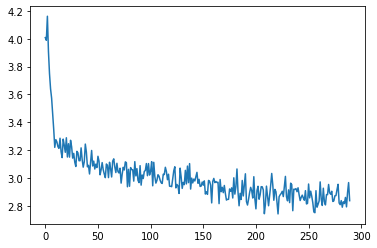

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.plot(total_lost)


In [12]:

max_length = 100
def invert_dict(d):
    return dict((v, k) for k, v in d.items())

num2word = invert_dict(index)

def sample(model,startWord='#',reverse=0):
    if reverse:
        startWord=startWord[::-1]
    if startWord!='#' and len(startWord)>1:
        input= get_lstm_input(startWord, output_tensor)[0]
    else:
        input = get_output_tensor(startWord[-1], index)
    hidden = model.initHidden()
    output_name = "";
    all_letters=[]
    if (startWord != "#"):
        output_name = startWord
        all_letters=[startWord]
    for i in range(max_length):
        output, hidden = model(input, hidden)
        topv, topi = output.data.topk(5)
        letters=[]
        for i in topi.data.tolist()[0]:
            if num2word[i]=='\n':
                letters.append('EOF')
            else:
                letters.append(num2word[i])
        all_letters.append(letters)
        w = num2word[topi.data.tolist()[0][0]]
        if (w >='A' and w <='Z'):
            output_name += w
            break
        elif w=='\n':
            break
        else:
            output_name += w
        input = get_output_tensor(w, index)
    all_letters.append(output_name)
    if reverse:
        output_name=output_name[::-1]
    return output_name,all_letters

model1 = torch.load('name-gen.pt',map_location=torch.device('cpu'))

for i in range(10):
    name1,all_letters=sample(model1,'Mo',reverse=0)
    print(name1)

    
    

Moich
Moarson
Moarce
Moarceh
Moarde
Moerv
Moard
Moash
Moich
Moich


In [11]:

from graphviz import Digraph

u = Digraph('unix', filename='unix.gv',
            node_attr={'color': 'lightblue2', 'style': 'filled'})
u.attr(size='6,6')


u.node(all_letters[0])
for i in range(1,len(all_letters)-1):
    temp=all_letters[i][0]
    all_letters[i][0]=all_letters[i][2]
    all_letters[i][2]=temp
    for j in range(5):
        u.node(str(i)+str(j),label=all_letters[i][j])
        if i==1:
            u.edge(all_letters[0],str(i)+str(j))
        else:
            u.edge(str(i-1)+'2',str(i)+str(j))

u.node(all_letters[-1])

u.edge(str(len(all_letters)-2)+'2',all_letters[-1])


u.view()

'unix.gv.pdf'